<a href="https://colab.research.google.com/github/rrizqiaa/MachineLearningTasks/blob/main/3rdWeekTask/CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah 1: Import library yang diperlukan

In [1]:
# Import library untuk analisis data dan pemodelan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Langkah 2: Load dataset
Pertama, kita akan membaca dataset dari file CSV. Pastikan untuk mengganti your_dataset.csv dengan lokasi file sebenarnya.

In [3]:
# Load dataset ke dalam DataFrame pandas
df = pd.read_csv('CreditDataset.csv')

# Lihat beberapa baris data untuk memeriksa
print(df.head())


    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


Langkah 3: Preprocessing data
Jika dataset mengandung data kategori, kita perlu mengubahnya menjadi numerik menggunakan LabelEncoder.

In [4]:
# Buat objek LabelEncoder
le = LabelEncoder()

# Identifikasi kolom kategori
categorical_columns = ['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17', 'x19', 'x20']

# Lakukan encoding pada kolom kategori
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Pisahkan fitur (X) dan label (y)
X = df.drop('Class', axis=1)  # Fitur
y = df['Class']               # Target atau label


Langkah 4: Split data menjadi train dan test
Kita akan memisahkan dataset menjadi 80% data training dan 20% data testing.

In [5]:
# Pisahkan dataset menjadi train dan test dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Langkah 5: Membangun model Decision Tree dan k-NN
Sekarang, kita akan membuat model Decision Tree dan k-NN, melatihnya dengan data training, dan menguji dengan data testing.



In [6]:
# Buat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model Decision Tree
dt_model.fit(X_train, y_train)

# Prediksi dengan model Decision Tree
y_pred_dt = dt_model.predict(X_test)


In [7]:
# Buat model k-NN (misalnya dengan 5 tetangga terdekat)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model k-NN
knn_model.fit(X_train, y_train)

# Prediksi dengan model k-NN
y_pred_knn = knn_model.predict(X_test)


Langkah 6: Evaluasi model
Sekarang kita akan mengevaluasi model menggunakan berbagai metrik seperti Akurasi, Presisi, Recall, F1-score, dan AUC-ROC.

In [8]:
# Fungsi evaluasi
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cetak hasil evaluasi
    print(f"Evaluasi {model_name}:")
    print(f"Akurasi: {accuracy:.2f}")
    print(f"Presisi: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}\n")

# Evaluasi model Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Evaluasi model k-NN
evaluate_model(y_test, y_pred_knn, "k-NN")


Evaluasi Decision Tree:
Akurasi: 0.73
Presisi: 0.78
Recall: 0.87
F1-Score: 0.82

Evaluasi k-NN:
Akurasi: 0.77
Presisi: 0.78
Recall: 0.93
F1-Score: 0.85



Untuk evaluasi ROC dan AUC, kita bisa menghitung dan memplot ROC Curve.

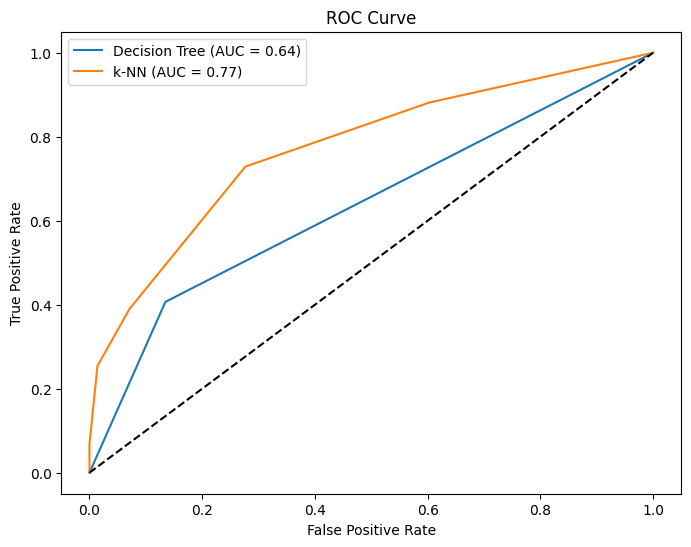

In [12]:
# Plot ROC Curve dengan menambahkan pos_label=2
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba, pos_label=2)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba, pos_label=2)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
